<a href="https://colab.research.google.com/github/shraddha-an/nextlabs_evaluation/blob/main/Checkin_Prediction_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Check-in Prediction**

# **1) Imports**

In [1]:
# Restart runtime after installing these packages.
!pip install matplotlib_inline --quiet
!pip install --upgrade matplotlib --quiet

     |████████████████████████████████| 11.2 MB 4.5 MB/s 
     |████████████████████████████████| 957 kB 31.9 MB/s 


In [1]:
# General
import pandas as pd
import numpy as np
import sklearn
import pickle

# Metrics
metrics = {}

# Plotting
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

sb.set_style('darkgrid')
%matplotlib inline
from IPython.display import Markdown, display

# NN
import tensorflow as tf
from tensorflow import keras

# save img in svg format
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

# google 
from google.colab import drive
drive.mount("/content/gdrive")

# Display data frame as a table
from google.colab import data_table
#data_table.enable_dataframe_formatter()

# Suppress warnings
import warnings

warnings.filterwarnings("ignore")

# pretty print
from pprint import pprint

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **2) Dataset**

In [2]:
# Importing the training dataset
path = "/content/gdrive/MyDrive/nxt_eval/train_data_evaluation_part_2.csv"
p2 = "/content/gdrive/MyDrive/nxt_eval/test_data_evaluation_part2.csv"

train = pd.read_csv(path)
test = pd.read_csv(p2)

# Drop the first 2 columns
train.drop(columns = ["Unnamed: 0", "ID"], inplace = True)
test.drop(columns = ["Unnamed: 0", "ID"], inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           82580 non-null  object 
 1   Age                   78834 non-null  float64
 2   DaysSinceCreation     82580 non-null  int64  
 3   AverageLeadTime       82580 non-null  int64  
 4   LodgingRevenue        82580 non-null  float64
 5   OtherRevenue          82580 non-null  float64
 6   BookingsCanceled      82580 non-null  int64  
 7   BookingsNoShowed      82580 non-null  int64  
 8   BookingsCheckedIn     82580 non-null  int64  
 9   PersonsNights         82580 non-null  int64  
 10  RoomNights            82580 non-null  int64  
 11  DaysSinceLastStay     82580 non-null  int64  
 12  DaysSinceFirstStay    82580 non-null  int64  
 13  DistributionChannel   82580 non-null  object 
 14  MarketSegment         82580 non-null  object 
 15  SRHighFloor        

In [3]:
train.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,...,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,4.667958,2.369411,...,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,4.562507,2.281758,...,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,7.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
test.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,967.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,...,1000.0,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000
mean,39.720786,4.100000,36.840000,163.522530,42.612590,0.0,0.0,0.485000,3.094000,1.464000,...,0.0,0.006000,0.0,0.047000,0.440000,0.125000,0.003000,0.0,0.0,0.115000
std,19.161205,3.124702,66.375508,302.384328,96.491848,0.0,0.0,0.511896,4.702901,2.094538,...,0.0,0.077266,0.0,0.211745,0.496635,0.330884,0.054717,0.0,0.0,0.319182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,25.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,42.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,53.000000,6.000000,41.250000,252.000000,42.000000,0.0,0.0,1.000000,5.000000,2.000000,...,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
max,90.000000,11.000000,340.000000,3104.000000,1139.500000,0.0,0.0,2.000000,30.000000,15.000000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [5]:
# Replacing the one row where alt < 0 in train
m = train["AverageLeadTime"] > 0
k = train["AverageLeadTime"].mean()

train["AverageLeadTime"] = train["AverageLeadTime"].where(m, k)

In [6]:
# Cleaning up the BookingsCanceled, BookingsNoShowed & BookingsCheckedIn columns
# value >= 0 == 1.
train["canceled?"] = train["BookingsCanceled"].apply(lambda x: 1 if x > 0 else 0)
train["no_show?"] = train["BookingsNoShowed"].apply(lambda x: 1 if x > 0 else 0)
train["checked_in?"] = train["BookingsCheckedIn"].apply(lambda x: 0 if x == 0 else 1)

test["canceled?"] = test["BookingsCanceled"].apply(lambda x: 1 if x > 0 else 0)
test["no_show?"] = test["BookingsNoShowed"].apply(lambda x: 1 if x > 0 else 0)
test["checked_in?"] = test["BookingsCheckedIn"].apply(lambda x: 0 if x == 0 else 1)

train.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,canceled?,no_show?,checked_in?
0,PRT,51.0,150,45.000000,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,1,0,1
1,PRT,NaN,1095,61.000000,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,1
2,DEU,31.0,1095,66.557205,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93.000000,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,1
4,FRA,51.0,1095,66.557205,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **i) Missing Values**

In [7]:
# Check for missing values
train.isna().sum()

Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
canceled?                  0
no_show?                   0
checked_in?                0
dtype: int64

In [8]:
test.isna().sum()

Nationality              0
Age                     33
DaysSinceCreation        0
AverageLeadTime          0
LodgingRevenue           0
OtherRevenue             0
BookingsCanceled         0
BookingsNoShowed         0
BookingsCheckedIn        0
PersonsNights            0
RoomNights               0
DaysSinceLastStay        0
DaysSinceFirstStay       0
DistributionChannel      0
MarketSegment            0
SRHighFloor              0
SRLowFloor               0
SRAccessibleRoom         0
SRMediumFloor            0
SRBathtub                0
SRShower                 0
SRCrib                   0
SRKingSizeBed            0
SRTwinBed                0
SRNearElevator           0
SRAwayFromElevator       0
SRNoAlcoholInMiniBar     0
SRQuietRoom              0
canceled?                0
no_show?                 0
checked_in?              0
dtype: int64

In [9]:
# Fill the missing values with mean of the age column.
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(test["Age"].mean())

In [10]:
train.isna().sum()

Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
canceled?               0
no_show?                0
checked_in?             0
dtype: int64

In [11]:
test.isna().sum()

Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
canceled?               0
no_show?                0
checked_in?             0
dtype: int64

## **ii) Dropping negative age values**

In [12]:
# Age has negative values, drop them
train = train[train["Age"] > 0]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82523 entries, 0 to 82579
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           82523 non-null  object 
 1   Age                   82523 non-null  float64
 2   DaysSinceCreation     82523 non-null  int64  
 3   AverageLeadTime       82523 non-null  float64
 4   LodgingRevenue        82523 non-null  float64
 5   OtherRevenue          82523 non-null  float64
 6   BookingsCanceled      82523 non-null  int64  
 7   BookingsNoShowed      82523 non-null  int64  
 8   BookingsCheckedIn     82523 non-null  int64  
 9   PersonsNights         82523 non-null  int64  
 10  RoomNights            82523 non-null  int64  
 11  DaysSinceLastStay     82523 non-null  int64  
 12  DaysSinceFirstStay    82523 non-null  int64  
 13  DistributionChannel   82523 non-null  object 
 14  MarketSegment         82523 non-null  object 
 15  SRHighFloor        

In [13]:
train["checked_in?"].value_counts()

1    63170
0    19353
Name: checked_in?, dtype: int64

# **3) Train/Valid Split**

In [14]:
# Dropping the BookingsCanceled, No show & checked in original columns
train_df = train.drop(columns = ["BookingsCanceled",  "BookingsNoShowed", "BookingsCheckedIn"])
test_df = test.drop(columns = ["BookingsCanceled",  "BookingsNoShowed", "BookingsCheckedIn"])

# Splitting into X; matrix of independent features & y, output variable.
X = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]

# Splitting into train and valid subsets
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 46)

print(f"Shapes of the train-valid splits")
display(Markdown('---'))

print(f"X_train: {X_train.shape}\tX_valid: {X_valid.shape}\
        y_train: {y_train.shape}\ty_valid: {y_valid.shape}")


# Forming the X, y subsets for test dataset
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

print(f"\n\nShape of the test splits")
display(Markdown('---'))

print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

Shapes of the train-valid splits


---

X_train: (61892, 27)	X_valid: (20631, 27)        y_train: (61892,)	y_valid: (20631,)


Shape of the test splits


---

X_test: (1000, 27)	y_test: (1000,)


## **i) Class Imbalance**
Implementing a simple scaling factor based on the counts of the 2 classes 

In [15]:
# Calculating class weights
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                  classes = np.unique(y_train),
                                                  y = y_train)

class_weights = {x: y for x, y in zip(np.unique(y_train), class_weights)}
class_weights

{0: 2.1367120071808325, 1: 0.6527452593389441}

## **ii) Feature Transformation**

In [16]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

# Separate numerical & categorical columns
categorical_features = X_train.select_dtypes(["object"]).columns
numeric_features = X_train.select_dtypes(["int64", "float64"]).columns

print(f"Categorical Features: {categorical_features}\n\nNumeric Features: {numeric_features}")

# Setup pipelines to handle transformations of categorical and numeric features.
from sklearn.pipeline import Pipeline

categorical_transformer = Pipeline(steps = [('onehotencode', OneHotEncoder(handle_unknown = 'ignore'))])

numeric_transformer = Pipeline(steps = [('scaling', MinMaxScaler())])


# Apply those transforms to the correct columns
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features),
                                                 ('cat', categorical_transformer, categorical_features)],
                                 remainder = "passthrough",
                                 sparse_threshold = 0)


Categorical Features: Index(['Nationality', 'DistributionChannel', 'MarketSegment'], dtype='object')

Numeric Features: Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'canceled?', 'no_show?'],
      dtype='object')


In [17]:
 # Applying transforms to the X matrices
Xtrain_processed = preprocessor.fit_transform(X_train)
Xvalid_processed = preprocessor.transform(X_valid)
Xtest_processed = preprocessor.transform(X_test)

Xtrain_processed.shape, Xvalid_processed.shape, Xtest_processed.shape

((61892, 215), (20631, 215), (1000, 215))

In [18]:
# save the preprocessor
pr = "/content/preprocessor_model.pkl"

# with open(pr, "wb") as f:
#     pickle.dump(preprocessor, f)

## **iii) Metrics Function**

In [19]:
# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def metrics_fn(y_pred, y_true, model_name, is_test = False):
  
  # Calculate metrics
  prec = round(precision_score(y_true, y_pred), 4)
  rec = round(recall_score(y_true, y_pred), 4)
  f1 = round(f1_score(y_true, y_pred), 4)
  acc = round(accuracy_score(y_true, y_pred), 4)

  # Confusion matrix
  cm = confusion_matrix(y_true, y_pred)

  # Update dictionary for test set
  if is_test:
    metrics[model_name] = {"Precision" : prec, "Recall": rec, "F1 Score" : f1,
                         "Accuracy": acc}

  # Print metrics
  print(f"{model_name}'s Metrics:")
  display(Markdown('---'))
  print(f"Precision:   {prec}\tRecall:  {rec}\t\tF1 Score:  {f1}\tAccuracy: {acc}")

  return cm

In [20]:
labels_ = np.array([0, 1])
type(labels_), labels_

(numpy.ndarray, array([0, 1]))

# **5) Modelling**

## **i) Decision Tree Classifier**

In [21]:
# Setup a pipeline to streamline preprocessing and the regression model
from sklearn.tree import DecisionTreeClassifier

name = "Decision Tree"
dt = DecisionTreeClassifier(class_weight = "balanced", random_state = 46, max_depth = 10)

# Training
dt.fit(Xtrain_processed, y_train)

# Predictions
y_pred = dt.predict(Xvalid_processed)

# metrics
cm = metrics_fn(y_pred, y_valid, name)

# getting the labels
labels_ = dt.classes_

Decision Tree's Metrics:


---

Precision:   1.0	Recall:  1.0		F1 Score:  1.0	Accuracy: 1.0


Decision Tree Classifier Confusion matrix


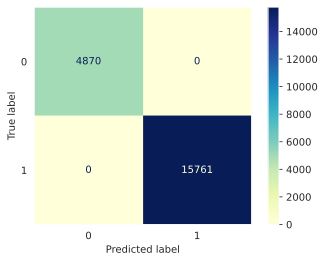

In [22]:
print(f"{name} Classifier Confusion matrix")
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels_)
disp.plot(include_values = True, cmap = 'YlGnBu', ax = None, xticks_rotation = 'horizontal')
plt.grid(False)
plt.show()

### **a.Test Set**

In [23]:
# Predictions
y_test_preds = dt.predict(Xtest_processed)

# metrics
cm_test = metrics_fn(y_test_preds, y_test, name, is_test = True)

Decision Tree's Metrics:


---

Precision:   1.0	Recall:  1.0		F1 Score:  1.0	Accuracy: 1.0


Decision Tree Classifier's Performance on Test Set


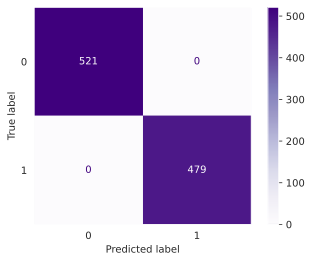

In [24]:
print(f"{name} Classifier's Performance on Test Set")

disp = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = labels_)
disp.plot(include_values = True, cmap = 'Purples', ax = None, xticks_rotation = 'horizontal')

plt.grid(False)
plt.show()

In [25]:
# saving the classifier
p_dt = "/content/dt_model.pkl"

# with open(p_dt, "wb") as f:
#     pickle.dump(dt, f)

### **b. Important Features**

In [26]:
# Resetting the preprocessing pipeline to preserve column names.
def preprocessing_pipeline(d: pd.DataFrame) -> pd.DataFrame:
  
  # Select the categorical variables
  categorical = d.select_dtypes(include = ["object"])

  categorical_ohe = pd.get_dummies(categorical, drop_first = True)

  # Replace the cateogrical columns from the data frame with the OHE'd columns
  d = d.drop(columns = categorical.columns)

  d = pd.concat([categorical_ohe, d], axis = 1)
  
  return d

# Encoding the categorical data
y1 = y
X1_cat = X.select_dtypes(["object"])
X1_cat = preprocessing_pipeline(X1_cat).reset_index(drop = True)

# Scaling the numerical data
X1_nu = X.select_dtypes(["int64", "float64"])
X1_num = MinMaxScaler().fit_transform(X1_nu)
X1_num = pd.DataFrame(X1_num, columns = X1_nu.columns.tolist()).reset_index(drop = True)

# Concat both
X1 = pd.concat([X1_cat, X1_num], axis = 1)

X1.head(4)

,Nationality_AGO,Nationality_AIA,Nationality_ALB,Nationality_AND,Nationality_ARE,Nationality_ARG,Nationality_ARM,Nationality_ASM,Nationality_ATA,Nationality_ATF,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,canceled?,no_show?
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Import Features according to DT
imp_features = pd.DataFrame(zip(X1.columns, abs(dt.feature_importances_)),
             columns = ["feature", "weight"]).sort_values("weight", ascending = False).reset_index(drop = True)

imp_features

,feature,weight
0,Nationality_ARM,1.0
1,Nationality_AGO,0.0
2,Nationality_SMR,0.0
3,Nationality_PRY,0.0
4,Nationality_QAT,0.0
...,...,...
210,Nationality_IND,0.0
211,Nationality_IOT,0.0
212,Nationality_IRL,0.0
213,Nationality_IRN,0.0


## **ii) Random Forest Classifier**

In [28]:
# Setup a pipeline to streamline preprocessing and the regression model
from sklearn.ensemble import RandomForestClassifier

name = "Random Forest"
rf = RandomForestClassifier(class_weight = "balanced", random_state = 46)

# Training
rf.fit(Xtrain_processed, y_train)

# Predictions
y_pred = rf.predict(Xvalid_processed)

# metrics
cm = metrics_fn(y_pred, y_valid, name)

Random Forest's Metrics:


---

Precision:   1.0	Recall:  1.0		F1 Score:  1.0	Accuracy: 1.0


Random Forest Classifier Confusion matrix


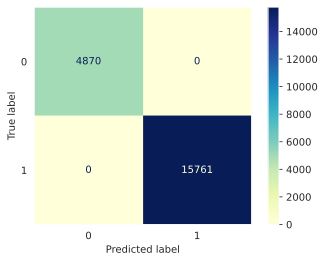

In [29]:
print(f"{name} Classifier Confusion matrix")

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels_)
disp.plot(include_values = True, cmap = 'YlGnBu', ax = None, xticks_rotation = 'horizontal')

plt.grid(False)
plt.show()

### **a. Test Set**

In [30]:
# Predictions
y_test_preds = rf.predict(Xtest_processed)

# metrics
cm_test = metrics_fn(y_test_preds, y_test, name, is_test = True)

Random Forest's Metrics:


---

Precision:   1.0	Recall:  1.0		F1 Score:  1.0	Accuracy: 1.0


Random Forest Classifier's Performance on Test Set


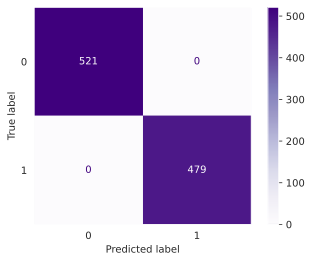

In [31]:
print(f"{name} Classifier's Performance on Test Set")

disp = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = labels_)
disp.plot(include_values = True, cmap = 'Purples', ax = None, xticks_rotation = 'horizontal')

plt.grid(False)
plt.show()

In [32]:
p_rf = "/content/rf_model.pkl"

# with open(p_rf, "wb") as f:
#     pickle.dump(rf, f)

### **b. Feature Importance**

In [33]:
# Import Features according to RF
imp_features = pd.DataFrame(zip(X1.columns, abs(rf.feature_importances_)),
             columns = ["feature", "weight"]).sort_values("weight", ascending = False).reset_index(drop = True)

imp_features.head(20)             

,feature,weight
0,Nationality_ARG,0.168190
1,Nationality_ARM,0.161717
2,Nationality_ASM,0.159205
3,Nationality_ATA,0.139460
4,Nationality_AND,0.134379
5,Nationality_ARE,0.127208
6,Nationality_ALB,0.053515
7,Nationality_AIA,0.043343
8,Nationality_AGO,0.008356
9,SRCrib,0.000747


## **iii) Neural Network**

In [34]:
# Creating Tf Dataset objects
x_train = np.array([np.array(val) for val in Xtrain_processed])

x_valid = np.array([np.array(val) for val in Xvalid_processed])

x_test = np.array([np.array(val) for val in Xtest_processed])

In [46]:
# NN model
# List of layers
input_features = x_train.shape[1]

nn_classifier = keras.Sequential([keras.layers.Dense(units = input_features, activation = 'relu'),
                                  keras.layers.Dense(units = 56, activation = "relu"),
                                  keras.layers.Dense(units = 1, activation = "sigmoid")
                              ])

# Compiling the model with optimizer, loss function & metrics
nn_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])

# Training
history = nn_classifier.fit(x_train, y_train, epochs = 10, batch_size = 32, verbose = 0)

In [47]:
# Valid set predictions
name = "Neural Network"
valid_preds = (nn_classifier.predict(x_valid) > 0.5).astype("int64")

cm = metrics_fn(valid_preds, y_valid, name)

Neural Network's Metrics:


---

Precision:   1.0	Recall:  1.0		F1 Score:  1.0	Accuracy: 1.0


Neural Network Classifier Confusion matrix


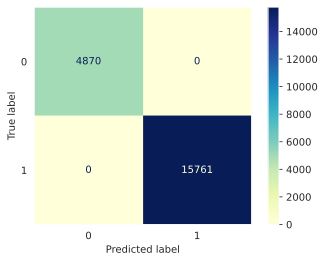

In [48]:
print(f"{name} Classifier Confusion matrix")

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels_)
disp.plot(include_values = True, cmap = 'YlGnBu', ax = None, xticks_rotation = 'horizontal')

plt.grid(False)
plt.show()

### **Test Set**

In [49]:
# test set predictions
test_preds = (nn_classifier.predict(x_test) > 0.5).astype("int64")

cm_test_nn = metrics_fn(test_preds, y_test, name, is_test = True)

Neural Network's Metrics:


---

Precision:   1.0	Recall:  0.9374		F1 Score:  0.9677	Accuracy: 0.97


Neural Network Classifier's Performance on Test Set


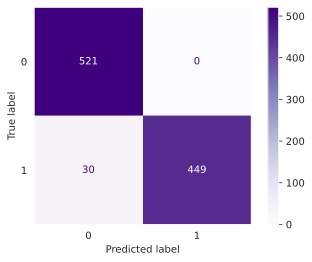

In [50]:
print(f"{name} Classifier's Performance on Test Set")

disp = ConfusionMatrixDisplay(confusion_matrix = cm_test_nn, display_labels = labels_)
disp.plot(include_values = True, cmap = 'Purples', ax = None, xticks_rotation = 'horizontal')

plt.grid(False)
plt.show()

In [54]:
# save the model
# best model: 56, bs = 32; e = 10
p_nn = "/content/gdrive/MyDrive/nxt_eval/nn_clf"

# nn_classifier.save(p_nn)

# **6) Metrics**

In [53]:
pprint(metrics)

{'Decision Tree': {'Accuracy': 1.0,
                   'F1 Score': 1.0,
                   'Precision': 1.0,
                   'Recall': 1.0},
 'Neural Network': {'Accuracy': 0.97,
                    'F1 Score': 0.9677,
                    'Precision': 1.0,
                    'Recall': 0.9374},
 'Random Forest': {'Accuracy': 1.0,
                   'F1 Score': 1.0,
                   'Precision': 1.0,
                   'Recall': 1.0}}
